In [1]:
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show, savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import plot_line_chart, HEIGHT, series_train_test_split, plot_forecasting_eval

In [2]:
file_tag = "forecast_covid"
filename = "datasets/forecast_covid_single.csv"
index = "date"
target = "deaths"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

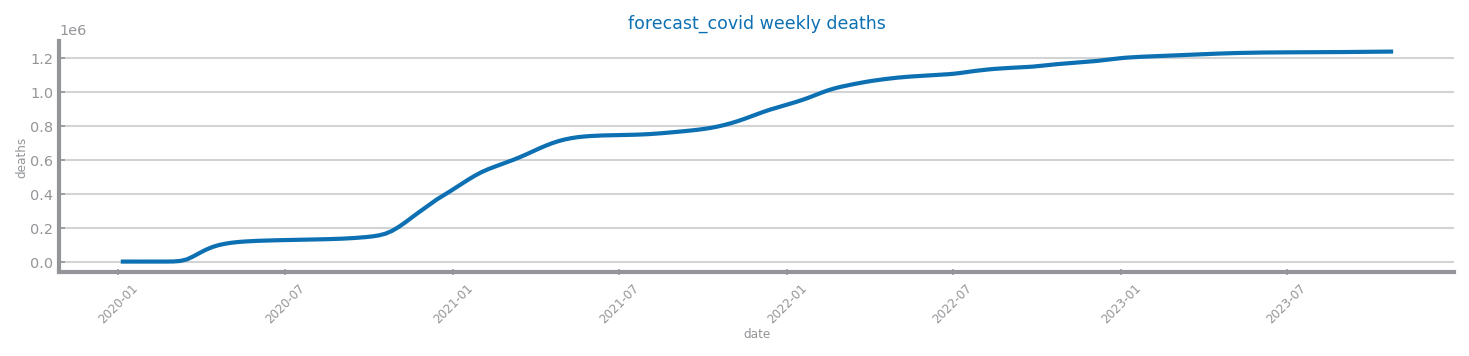

In [3]:
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)

#dont uncomment this, its just an example of the savefig, since the teacher doesn't save the pics this time
#savefig(f"images/forecast/{file_tag}_data_transformation_smoothing_<whatever-you-doing-in-this-step>", bbox_inches="tight")
show()

In [ ]:
train, test = series_train_test_split(smooth_data, trn_pct=0.90)

trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(smooth_data)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} smoothing - Linear Regression")
savefig(f"images/{file_tag}_data_transformation_smoothing_linear_regression_eval.png")